<a href="https://colab.research.google.com/github/drhoffma/HarperIDEAShopCVCC/blob/main/lessons/05_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://github.com/drhoffma/HarperIDEAShopCVCC/blob/main/colab_template/header_image.png?raw=true)

# Welcome to **Harper College's IDEAShop** curriculum!

**Course Title:** *Computer Vision, Cameras, & Code*

**Quick Links:** [Homepage](https://tinyurl.com/harpercv-home) | [Syllabus](https://tinyurl.com/harpercv-syllabus) | [Blackboard](#) | [Instructor](https://davidrhoffman.net)

***Terms of use:*** *This course is public domain. If you'd like to use content from this course, please request consent by [contacting Harper College MakerSpace](https://www.harpercollege.edu/maker/contact/index.php).*

---

# Deep Learning

* Image Classification - is the entire image representative of a "dog"?
* Object Detection - where is the "dog" in the image?
* Segmentation - highlight all the pixels where the "dog" is in the image

(replace "dog" with your favorite class of data)

## Training

### ShallowNet CNN from PyImageSearch's Deep Learning Book

In [16]:
# CNN code

# imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K

# CNN class
class ShallowNet:
  @staticmethod
  def build(width, height, depth, classes):
    # initialize the model
    model = Sequential()

    # initialize the input shape
    inputShape = (height, width, depth)

    # handle "channels first"
    if K.image_data_format() == "channels_first":
      inputShape = (depth, height, width)

    # add layers to our model 
    model.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))

    # softmax classifier
    model.add(Flatten())
    model.add(Dense(classes))
    model.add(Activation("softmax")) # produce the probabilities which sum to 1

    # return the CNN structure
    return model


s = ShallowNet()
model = s.build(244, 244, 3, 3)
print(model.summary())

print(1000 * 100 * 5716355)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 244, 244, 32)      896       
_________________________________________________________________
activation_4 (Activation)    (None, 244, 244, 32)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1905152)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 5715459   
_________________________________________________________________
activation_5 (Activation)    (None, 3)                 0         
Total params: 5,716,355
Trainable params: 5,716,355
Non-trainable params: 0
_________________________________________________________________
None
571635500000


### PyImageSearch Preprocessing modules from their Deep Learning Book

#### Image to Array Preprocessor

In [12]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import img_to_array

class ImageToArrayPreprocessor:
	def __init__(self, dataFormat=None):
		# store the image data format
		self.dataFormat = dataFormat

	def preprocess(self, image):
		# apply the Keras utility function that correctly rearranges
		# the dimensions of the image
		return img_to_array(image, data_format=self.dataFormat)

#### Simple Preprocessor

In [14]:
# import the necessary packages
import cv2

class SimplePreprocessor:
	def __init__(self, width, height, inter=cv2.INTER_AREA):
		# store the target image width, height, and interpolation
		# method used when resizing
		self.width = width
		self.height = height
		self.inter = inter

	def preprocess(self, image):
		# resize the image to a fixed size, ignoring the aspect
		# ratio
		return cv2.resize(image, (self.width, self.height),
			interpolation=self.inter)

#### Simple Dataset Loader

In [15]:
# import the necessary packages
import numpy as np
import cv2
import os

class SimpleDatasetLoader:
	def __init__(self, preprocessors=None):
		# store the image preprocessor
		self.preprocessors = preprocessors

		# if the preprocessors are None, initialize them as an
		# empty list
		if self.preprocessors is None:
			self.preprocessors = []

	def load(self, imagePaths, verbose=-1):
		# initialize the list of features and labels
		data = []
		labels = []

		# loop over the input images
		for (i, imagePath) in enumerate(imagePaths):
			# load the image and extract the class label assuming
			# that our path has the following format:
			# /path/to/dataset/{class}/{image}.jpg
			image = cv2.imread(imagePath)
			label = imagePath.split(os.path.sep)[-2]

			# check to see if our preprocessors are not None
			if self.preprocessors is not None:
				# loop over the preprocessors and apply each to
				# the image
				for p in self.preprocessors:
					image = p.preprocess(image)

			# treat our processed image as a "feature vector"
			# by updating the data list followed by the labels
			data.append(image)
			labels.append(label)

			# show an update every `verbose` images
			if verbose > 0 and i > 0 and (i + 1) % verbose == 0:
				print("[INFO] processed {}/{}".format(i + 1,
					len(imagePaths)))

		# return a tuple of the data and labels
		return (np.array(data), np.array(labels))

### Training Code

In [ ]:
# mount your google drive (confirm via the link)
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:

! unzip 'gdrive/My Drive/Colab Notebooks/animals.zip'

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


========= TRAINING IS STARTING ============
Epoch 1/100
71/71 [==============================] - 2s 24ms/step - loss: 1.0179 - accuracy: 0.4573 - val_loss: 0.9712 - val_accuracy: 0.4880
Epoch 2/100
71/71 [==============================] - 2s 21ms/step - loss: 0.9298 - accuracy: 0.5418 - val_loss: 0.9217 - val_accuracy: 0.5533
Epoch 3/100
71/71 [==============================] - 1s 21ms/step - loss: 0.8925 - accuracy: 0.5609 - val_loss: 1.0090 - val_accuracy: 0.5360
Epoch 4/100
71/71 [==============================] - 1s 21ms/step - loss: 0.8707 - accuracy: 0.5782 - val_loss: 0.9110 - val_accuracy: 0.5440
Epoch 5/100
71/71 [==============================] - 1s 21ms/step - loss: 0.8511 - accuracy: 0.5782 - val_loss: 0.8851 - val_accuracy: 0.5467
Epoch 6/100
71/71 [==============================] - 1s 21ms/step - loss: 0.8342 - accuracy: 0.5880 - val_loss: 0.8730 - val_accuracy: 0.5573
Epoch 7/100
71/71 [==============================] - 1s 21ms/step - loss: 0.8234 - accuracy: 0.5960 - va

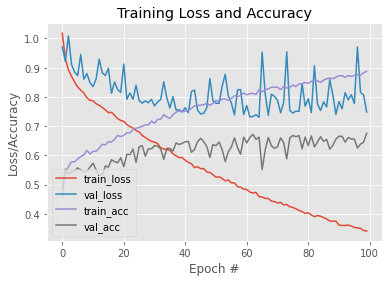

In [22]:
# imports
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np

# load a dataset
data_path = "animals"
imagePaths = list(paths.list_images(data_path))

# initialize our preprocessors
iap = ImageToArrayPreprocessor()
sp = SimplePreprocessor(32, 32)

##### load data
sdl = SimpleDatasetLoader(preprocessors=[iap, sp])
(data, labels) = sdl.load(imagePaths)

# scale the pixel intensities from the range [0, 255] to [0, 1]
data = data.astype("float") / 255.0

# separate the data into 75% training & 25% testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

# convert labels from integers to "one-hot encoded" vectors
# three class [cat, dog, panda]
# cat would be represented as [1, 0, 0] vector
# panda would be represented as [0, 0, 1] vector
trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

# load the model
opt = SGD(lr=0.005)
model = ShallowNet.build(width=32, height=32, depth=3, classes=3)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# train the model on the data
print("========= TRAINING IS STARTING ============")
EPOCHS = 100
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=32, epochs=EPOCHS, verbose=1)

# evaluate the model
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=["cat", "dog", "panda"]))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, EPOCHS), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, EPOCHS), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

## Pre-trained Models (Perform Inference)

In [2]:
! wget https://github.com/drhoffma/HarperIDEAShopCVCC/raw/main/lessons/images/wine.jpg

--2021-07-29 14:05:55--  https://github.com/drhoffma/HarperIDEAShopCVCC/raw/main/lessons/images/wine.jpg
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/drhoffma/HarperIDEAShopCVCC/main/lessons/images/wine.jpg [following]
--2021-07-29 14:05:55--  https://raw.githubusercontent.com/drhoffma/HarperIDEAShopCVCC/main/lessons/images/wine.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32846 (32K) [image/jpeg]
Saving to: ‘wine.jpg.1’

wine.jpg.1          100%[===================>]  32.08K  --.-KB/s    in 0.001s  

2021-07-29 14:05:55 (27.9 MB/s) - ‘wine.jpg.1’ saved [32846/32846]



In [5]:
# imports
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
import numpy as np
import cv2

# load an image
image = load_img("wine.jpg", target_size=(224, 224))

# load the image as an array
image = img_to_array(image)

# create a batch
image = np.expand_dims(image, axis=0)

# preprocess
image = preprocess_input(image)

# load a an ImageNet model
model = VGG16(weights="imagenet")

# perform inference
predictions = model.predict(image)
p = decode_predictions(predictions)

# print the results
#print(p)
# [ [(), (), ()] ]

for i, (filename, class_label, probability) in enumerate(p[0]):
  print("{}. {}: {:.2f}%".format(i+1, class_label, probability * 100))

# display results


1. red_wine: 31.85%
2. hook: 5.38%
3. pole: 5.21%
4. padlock: 4.92%
5. binoculars: 4.69%
